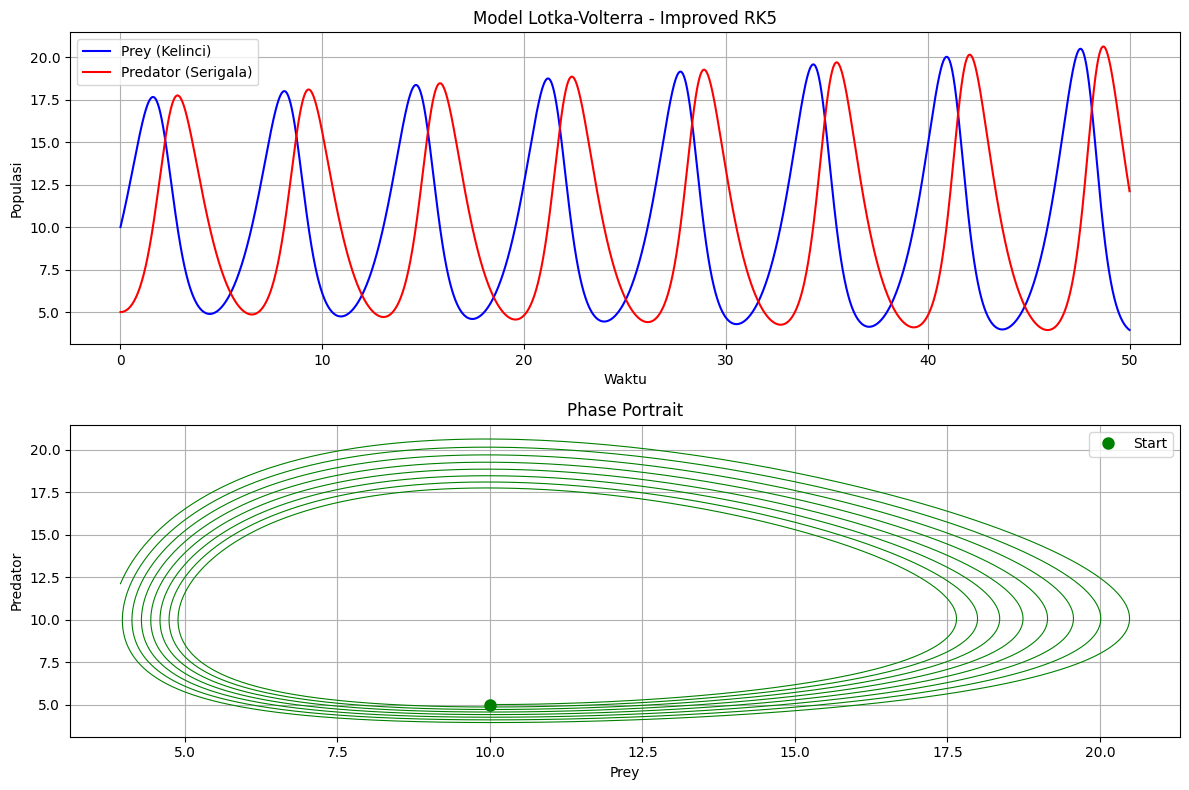

Beberapa nilai solusi:
Time		Prey		Predator
0.00		10.0000		5.0000
5.00		5.2775		7.4731
10.00		6.1015		15.5723
15.00		17.3239		13.3787
20.00		12.6171		4.8109
25.00		5.6458		5.8462
30.00		4.6714		13.3522
35.00		15.3467		17.3110
40.00		14.8054		4.7894
45.00		5.8606		4.9078
50.00		3.9458		12.1079


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def improved_rk5_lotka_volterra(f, t_span, y0, h, n_steps_back=1):
    """
    Menyelesaikan sistem ODE menggunakan metode Improved Runge-Kutta orde 5.
    
    Parameters:
        f: fungsi turunan (dy/dt)
        t_span: tuple (t_start, t_end)
        y0: kondisi awal [y1_0, y2_0]
        h: step size
        n_steps_back: jumlah langkah mundur yang diperlukan (default=1)
    
    Returns:
        t: array waktu
        y: array solusi [y1, y2]
    """
    t_start, t_end = t_span
    n_steps = int((t_end - t_start) / h) + 1
    t = np.linspace(t_start, t_end, n_steps)
    
    # Inisialisasi array solusi
    y = np.zeros((n_steps, len(y0)))
    y[0] = y0
    
    # Untuk langkah pertama, kita butuh nilai sebelumnya
    # Gunakan metode Runge-Kutta klasik orde 4 untuk inisialisasi
    for i in range(min(n_steps_back, n_steps-1)):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + h/2, y[i] + h/2 * k1)
        k3 = f(t[i] + h/2, y[i] + h/2 * k2)
        k4 = f(t[i] + h, y[i] + h * k3)
        y[i+1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    # Metode Improved Runge-Kutta orde 5
    for i in range(n_steps_back, n_steps-1):
        # Current step
        k1 = f(t[i], y[i])
        k2 = f(t[i] + 0.25*h, y[i] + 0.25*h*k1)
        k3 = f(t[i] + 0.25*h, y[i] - 0.7272*h*k1 + 0.7322*h*k2)
        k4 = f(t[i] + 0.5*h, y[i] + 0.5734*h*k1 - 2.2485*h*k2 + 3.344*h*k3)
        k5 = f(t[i] + 0.75*h, y[i] + 0.1750*h*k1 + 0.0121*h*k2 + 0.0559*h*k3 + 0.5517*h*k4)
        
        # Previous step (i-1)
        k_1 = f(t[i-1], y[i-1])
        k_2 = f(t[i-1] + 0.25*h, y[i-1] + 0.25*h*k_1)
        k_3 = f(t[i-1] + 0.25*h, y[i-1] - 0.7272*h*k_1 + 0.7322*h*k_2)
        k_4 = f(t[i-1] + 0.5*h, y[i-1] + 0.5734*h*k_1 - 2.2485*h*k_2 + 3.344*h*k_3)
        k_5 = f(t[i-1] + 0.75*h, y[i-1] + 0.1750*h*k_1 + 0.0121*h*k_2 + 0.0559*h*k_3 + 0.5517*h*k_4)
        
        # Update solusi
        y[i+1] = y[i] + h * (
            1.0222*k1 - 0.0222*k_1 - 
            0.0961*(k2 - k_2) + 
            0.0295*(k3 - k_3) - 
            0.1*(k4 - k_4) + 
            0.06444*(k5 - k_5)
        )
    
    return t, y

# Model Lotka-Volterra
def lotka_volterra(t, y, alpha=1.0, beta=0.1, delta=0.1, gamma=1.0):
    """
    Sistem persamaan Lotka-Volterra:
    dy1/dt = alpha*y1 - beta*y1*y2  (prey/pemangsa)
    dy2/dt = delta*y1*y2 - gamma*y2  (predator/pemangsa)
    """
    y1, y2 = y
    dydt = np.array([
        alpha * y1 - beta * y1 * y2,    # Prey equation
        delta * y1 * y2 - gamma * y2    # Predator equation
    ])
    return dydt

# Parameter simulasi
t_span = (0, 50)  # waktu simulasi
y0 = np.array([10, 5])  # kondisi awal [prey, predator]
h = 0.01  # step size

# Wrapper function untuk Lotka-Volterra dengan parameter default
def f_lotka_volterra(t, y):
    return lotka_volterra(t, y, alpha=1.0, beta=0.1, delta=0.1, gamma=1.0)

# Solusi numerik
t, y = improved_rk5_lotka_volterra(f_lotka_volterra, t_span, y0, h)

# Plot hasil
plt.figure(figsize=(12, 8))

# Plot populasi vs waktu
plt.subplot(2, 1, 1)
plt.plot(t, y[:, 0], 'b-', label='Prey (Kelinci)')
plt.plot(t, y[:, 1], 'r-', label='Predator (Serigala)')
plt.xlabel('Waktu')
plt.ylabel('Populasi')
plt.title('Model Lotka-Volterra - Improved RK5')
plt.legend()
plt.grid(True)

# Plot phase portrait
plt.subplot(2, 1, 2)
plt.plot(y[:, 0], y[:, 1], 'g-', linewidth=0.8)
plt.plot(y[0, 0], y[0, 1], 'go', markersize=8, label='Start')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.title('Phase Portrait')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print beberapa nilai solusi
print("Beberapa nilai solusi:")
print("Time\t\tPrey\t\tPredator")
for i in range(0, len(t), len(t)//10):
    print(f"{t[i]:.2f}\t\t{y[i,0]:.4f}\t\t{y[i,1]:.4f}")